In [80]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

import xarray as xr


ModuleNotFoundError: No module named 'xarray'

In [2]:
t_CLT = [160, 180, 200, 220, 240, 260, 280, 300]
GL_b_ = [ 280, 320, 340, 360, 380, 400, 420, 440, 480, 500, 520, 540, 560, 580, 600 ] 
GL_h_ = [320, 360, 400, 440, 480, 520, 560, 600, 640, 680, 720, 760, 800 ]

In [3]:
# Frame Geometry
L_X = 30000
L_Y = 40000

N_X = np.array([3,4,5,6,7,8,9,10])
N_Y = np.array([3,4,5,6,7,8,9,10])

Dx = L_X/(N_X-1)
Dy = L_Y/(N_Y-1)

In [4]:
# Loads
q_DL_d = 2 # kN/m^2
q_LL_d = 2.55 # kN/m^2
q_DL_facade = 2 # kN/m

In [5]:
# Load coefficients
#ULS
gamma_ULS_DL = 1.35
gamma_ULS_LL_A = 1.5

Psi_LL_B = [0.7, 0.5, 0.3]
#SLS - characteristic/rare

gamma_SLSc_DL = 1.0
gamma_SLSc_LL_A = 1.0

#SLS - Quasi permanent
gamma_SLSqp_DL = 1.0
gamma_SLSqp_LL_A = 1.0

#SLS - Frequent
gamma_SLSf_DL = 1.0
gamma_SLSf_LL_A = 1.0

# Material

In [6]:
# Material 

# CLT
Mat_01 = 'GL24h'
fm_k = 24 # MPa
ft_0_k = 14 # MPa
ft_90_k = 0.12 # MPa
fc_0_k = 21 # MPa
fc_90_k = 2.5 # MPa
fv_k = 4 # MPa
Em_0_mean = 12000 # MPa
#Em_90_mean = 1
#Em_0_mean = 1
G_mean = 690 # MPa


# Glulam GL24h
GL24h = {
"fm_k" : 24 , # MPa,
"ft_0_k" : 19.2, # MPa
"ft_90_k" : 0.5 ,# MPa
"fc_0_k" : 24 , # MPa
"fc_90_k" : 2.5 , # MPa
"fv_k" : 3.5 , # MPa
"Em_0_mean" : 11500 , # MPa
#Em_90_mean = 1
#Em_0_mean = 1
"G_mean" : 650
}

gamma_m_CLT = 1.3
k_mod_CLT = 0.8 # K_mod for CLT in service class 1 = 0.8
k_mod_GL = 0.8 


# Section properties

In [7]:
# Section properties
# CLT
t_CLT_i = 200

A_CLT_net_i = 120000
A_CLT_tot_i = 200000

I_CLT_net_i = 527999900 # mm^4 moment od inertia net section
I_CLT_tot_i = 666666700 # mm^4 moment of inertia total section


W_CLT_net_i = 5279999 # mm^3 Section modulus net section
W_CLT_tot_i = 6666668 # mm^3 Section modulus total section

E_CLT_i = Em_0_mean


# Glulam
b_GL_i = 400
h_GL_i = 680

A_GL_i = b_GL_i * h_GL_i

I_GL_y_i = 1/12 * b_GL_i * h_GL_i**3 # mm^4 moment od inertia about y axis
I_GL_z_i = 1/12 * h_GL_i * b_GL_i**3 # mm^4 moment od inertia about z axis


E_CLT_i = Em_0_mean

In [8]:
def w_2span_unifLoad(E_, I_, L_, q_):
    E = E_
    I = I_
    L = L_
    q = q_
    
    return  1 / 185 * q * L**4 / (E*I) 
    
def w_1span_unifLoad(E_, I_, L_, q_):
    E = E_
    I = I_
    L = L_
    q = q_
    
    return  5 / 384 * q * L**4 / (E*I) 

In [74]:
dict = {"DX": Dx,
       "DY": Dy[0] * np.ones(len(Dx)),
       "t_CLT": np.ones(len(Dx)),
       "w_fin": np.ones(len(Dx)), 
       "Volume_Timber": np.ones(len(Dx)).astype(int) 
       }

pd.options.display.float_format = ' {:.1f}'.format
pd.set_option('colheader_justify', 'center')


#from IPython.display import HTML

Volume_Matrix = pd.DataFrame(dict)

#Volume_Matrix.style.set_properties(**{'align': 'center'})

#pd.DataFrame(dict).xs['Volume_Timber',0] 

#left_aligned_df = pd.DataFrame(dict).style.set_properties(**{'text-align': 'center'})
#display(left_aligned_df)

Matrix_CLT_thick = pd.DataFrame({'t_CLT':t_CLT[0], 'Volume_': [Volume_Matrix] } ).set_index('t_CLT')


In [78]:
#Volume_Matrix.loc[ii,'Volume_Timber'] = 10
Matrix_CLT_thick.loc[160,'Volume_']

,DX,DY,t_CLT,w_fin,Volume_Timber
0,15000.0,20000.0,1.0,1.0,1
1,10000.0,20000.0,1.0,1.0,1
2,7500.0,20000.0,1.0,1.0,1
3,6000.0,20000.0,1.0,1.0,1
4,5000.0,20000.0,1.0,1.0,1
5,4285.7,20000.0,1.0,1.0,1
6,3750.0,20000.0,1.0,1.0,1
7,3333.3,20000.0,1.0,1.0,1


In [71]:
Matrix_CLT_thick['Volume_'][1]

nan

In [67]:
Volume_Matrix

,DX,DY,t_CLT,w_fin,Volume_Timber
0,15000.0,20000.0,1.0,1.0,1
1,10000.0,20000.0,1.0,1.0,1
2,7500.0,20000.0,1.0,1.0,1
3,6000.0,20000.0,1.0,1.0,1
4,5000.0,20000.0,1.0,1.0,1
5,4285.7,20000.0,1.0,1.0,1
6,3750.0,20000.0,1.0,1.0,1
7,3333.3,20000.0,1.0,1.0,1


In [11]:
# Deflections check
# w_123 = w1+w2+w3
yy = 3


for tt_CLT_i in t_CLT:
    

    for ii in range(0,len(N_X)):

        Volume_Matrix.loc[ii,'DX'] = Dx[ii]
        Volume_Matrix.loc[ii,'DY'] = Dy[yy]


#         t_CLT_i = t_CLT_i
        E_CLT_i = E_CLT_i
        I_CLT_i = I_CLT_net_i
        L_CLT_i = Dx[ii]


        q_CLT_i = ( q_DL_d * gamma_ULS_DL + q_LL_d * gamma_SLSc_LL_A ) * 1000 / 10**6 * 1000 # N/mm^2

        w_CLT = w_2span_unifLoad(E_CLT_i, I_CLT_i, L_CLT_i, q_CLT_i) / k_mod_CLT  # mm - Deflection CLT, units in N, mm

        E_GL_i = GL24h["Em_0_mean"]
        I_GL_i = I_GL_y_i
        L_GL_i = Dy[yy]
        q_GL_i = 10/8 * q_CLT_i/1000 * Dx[ii]

        # Deflection limit
        L_defl = (L_CLT_i**2 + L_GL_i**2)**0.5
        w_lim = L_defl / 333 

        w_GL_1 = w_1span_unifLoad(E_GL_i, I_GL_i, L_GL_i, q_GL_i) / k_mod_GL # mm - Deflection od Glulam beam, units in N, mm


        Volume_Matrix.loc[ii,'w_fin'] = w_CLT + w_GL_1

        Volume_Matrix.loc[ii,'t_CLT'] = t_CLT_i

        if w_CLT+w_GL_1 < w_lim:    

            # Volume

            Vol_CLT = t_CLT_i * L_X * L_Y / 10**9 # m^3 Volume of CLT per floor
            Vol_GL_1 = N_X[ii] * b_GL_i * h_GL_i * L_Y / 10**9 # m^3 Volume of Glulam per floor

            Volume_Matrix.loc[ii,'Volume_Timber'] = Vol_CLT + Vol_GL_1

        else : 
            Volume_Matrix.loc[ii,'Volume_Timber'] = 'Nan'
            
Volume_Matrix 


,DX,DY,t_CLT,w_fin,Volume_Timber
0,15000.0,8000.0,200.0,337.9,Nan
1,10000.0,8000.0,200.0,92.3,Nan
2,7500.0,8000.0,200.0,44.9,Nan
3,6000.0,8000.0,200.0,29.0,305.3
4,5000.0,8000.0,200.0,21.6,316.2
5,4285.7,8000.0,200.0,17.4,327.0
6,3750.0,8000.0,200.0,14.7,337.9
7,3333.3,8000.0,200.0,12.8,348.8


In [12]:
Matrix_CLT_thick

,Volume_Timber
t_CLT,
160,1.0
180,1.0
200,1.0
220,1.0
240,1.0
260,1.0
280,1.0
300,1.0


In [20]:
    Matrix_CLT_thick['Volume_Timber'][tt_CLT_i] = 70
    
    Matrix_CLT_thick

,Volume_Timber
t_CLT,
160,1.0
180,1.0
200,1.0
220,1.0
240,1.0
260,1.0
280,1.0
300,70.0


In [14]:
dict = {"DX": Dx,
       "DY": Dy[ii] * np.ones(len(Dx)),
       "t_CLT": np.ones(len(Dx)),
       "Volume_Timber": np.ones(len(Dx)).astype(int) 
       }

import pandas as pd
#pd.options.display.float_format = ' {:.1f}'.format
Volume_Matrix = pd.DataFrame(dict)


print(Volume_Matrix)

     DX       DY    t_CLT  Volume_Timber
0  15000.0  4444.4   1.0         1      
1  10000.0  4444.4   1.0         1      
2   7500.0  4444.4   1.0         1      
3   6000.0  4444.4   1.0         1      
4   5000.0  4444.4   1.0         1      
5   4285.7  4444.4   1.0         1      
6   3750.0  4444.4   1.0         1      
7   3333.3  4444.4   1.0         1      


In [124]:
Dx

array([15000.        , 10000.        ,  7500.        ,  6000.        ,
        5000.        ,  4285.71428571,  3750.        ,  3333.33333333])

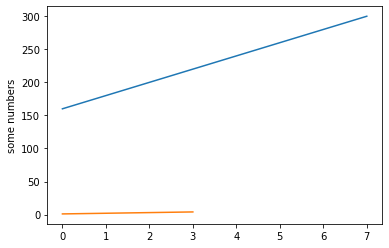

In [32]:
plt.plot(t_CLT)

plt.plot([1,2,3,4])
plt.ylabel('some numbers')
plt.show()